# **Analisis Tren dan Pola Kunjungan Pasien BPJS Rawat Inap Berdasarkan Ruang Perawatan di RSUD Kota Bandung (2015-2023)**

## **Pendahuluan**
Ini berfokus pada analisis data perubahan iklim di Indonesia. Dataset yang digunakan mencakup berbagai indikator seperti luas lahan pertanian. Dalam analisis ini, kita akan melalui beberapa tahap, mulai dari pembersihan data, eksplorasi data, visualisasi tren, hingga prediksi menggunakan model regresi linear.

## **Tujuan**
Tujuan dari analisis ini adalah Menganalisis tren dan pola kunjungan pasien BPJS rawat inap di RSUD Kota Bandung berdasarkan berbagai ruang perawatan selama periode 2015-2023.



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Set style for plots
sns.set(style="whitegrid")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving jmlh_knjngn_psn_bpjs_rwt_np_brdsrkn_rng_prwtn_d_rsd_kt_bndng_2.csv to jmlh_knjngn_psn_bpjs_rwt_np_brdsrkn_rng_prwtn_d_rsd_kt_bndng_2.csv


In [4]:
data = pd.read_csv('jmlh_knjngn_psn_bpjs_rwt_np_brdsrkn_rng_prwtn_d_rsd_kt_bndng_2.csv')

In [6]:
# Tampilkan lima baris pertama dari data
data.head()

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,nama_ruang_perawatan,jumlah_pasien,satuan,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,PENYAKIT DALAM (FLAMBOYAN),1780,ORANG,2015
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,BEDAH (MAWAR),1425,ORANG,2015
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,ANAK ( SAKURA ),961,ORANG,2015
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,OBGIN ( ASTER ),1967,ORANG,2015
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,PERINATOLOGI ( MELATI ),642,ORANG,2015


In [7]:
# Memeriksa apakah ada nilai yang hilang
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                         0
kode_provinsi              0
nama_provinsi              0
bps_kode_kabupaten_kota    0
bps_nama_kabupaten_kota    0
nama_ruang_perawatan       0
jumlah_pasien              0
satuan                     0
tahun                      0
dtype: int64


Visualisasi ini akan menunjukkan distribusi jumlah pasien BPJS rawat inap per tahun.

<ipython-input-9-d4580ad10971>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tahun', y='jumlah_pasien', data=data, ci=None)


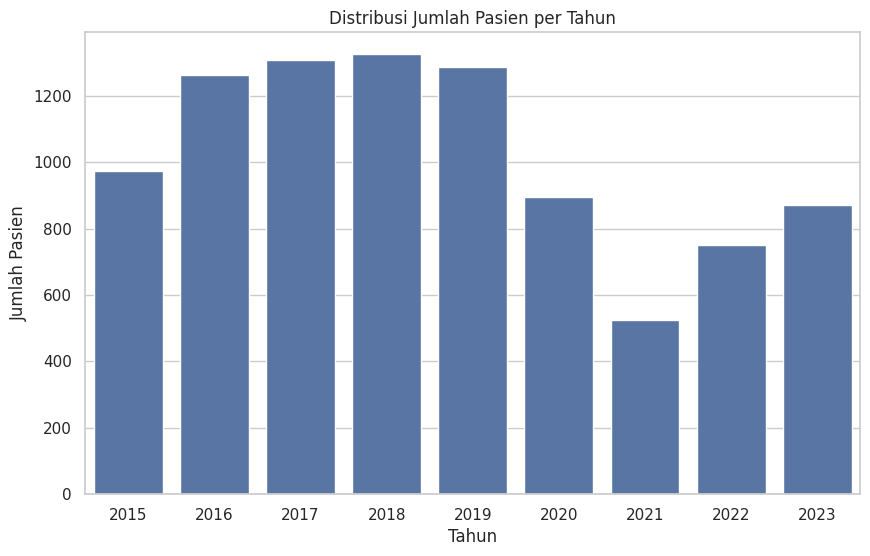

In [9]:
# Plotting the distribution of patients per year
plt.figure(figsize=(10, 6))
sns.barplot(x='tahun', y='jumlah_pasien', data=data, ci=None)
plt.title('Distribusi Jumlah Pasien per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pasien')
plt.show()

Grafik ini memberikan gambaran tentang bagaimana jumlah pasien yang dirawat inap di RSUD Kota Bandung telah berubah dari tahun ke tahun. Ini membantu kita melihat apakah ada tren peningkatan atau penurunan jumlah pasien dari waktu ke waktu.

<ipython-input-10-88369f5d8a40>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='jumlah_pasien', y='nama_ruang_perawatan', data=data, ci=None)


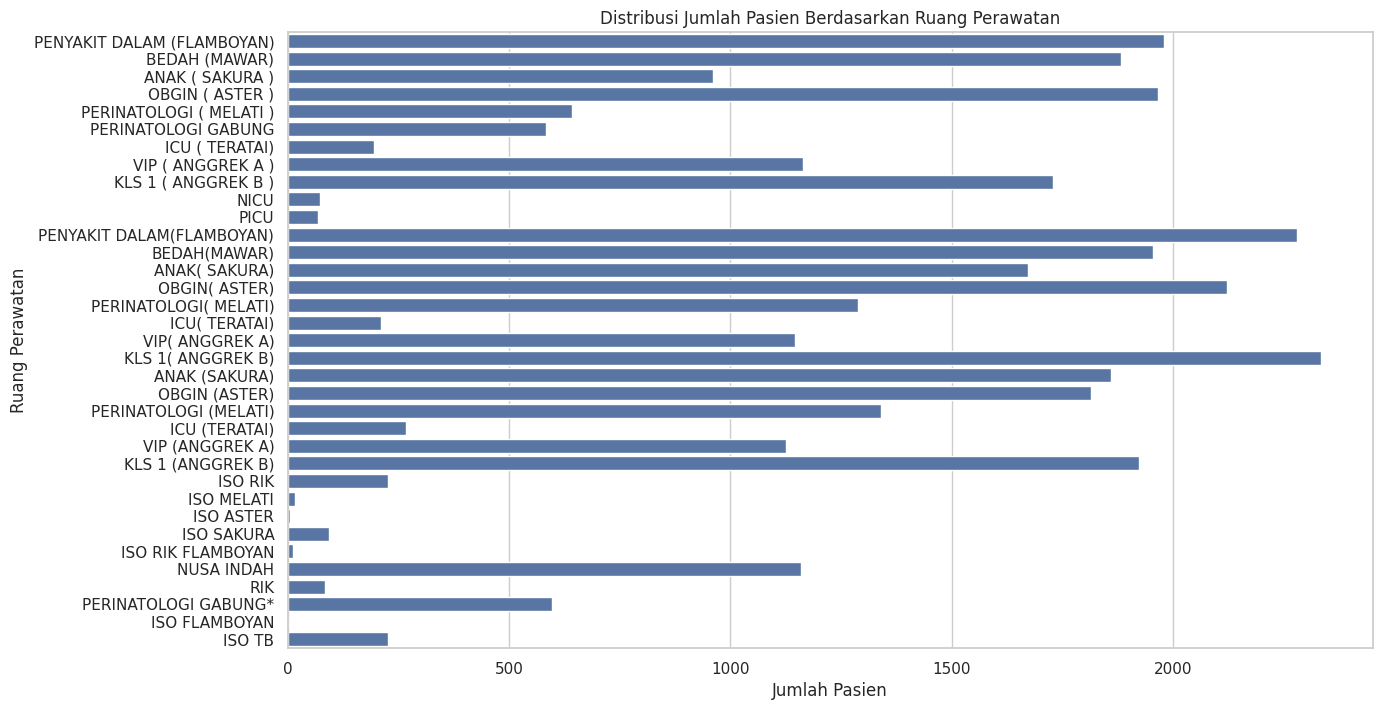

In [10]:
# Plotting the distribution of patients by ruang perawatan
plt.figure(figsize=(14, 8))
sns.barplot(x='jumlah_pasien', y='nama_ruang_perawatan', data=data, ci=None)
plt.title('Distribusi Jumlah Pasien Berdasarkan Ruang Perawatan')
plt.xlabel('Jumlah Pasien')
plt.ylabel('Ruang Perawatan')
plt.show()

Grafik ini membantu kita memahami ruang perawatan mana yang paling sering dikunjungi oleh pasien BPJS. Ini juga bisa menunjukkan apakah ada ruang perawatan tertentu yang mengalami lonjakan atau penurunan dalam jumlah pasien.

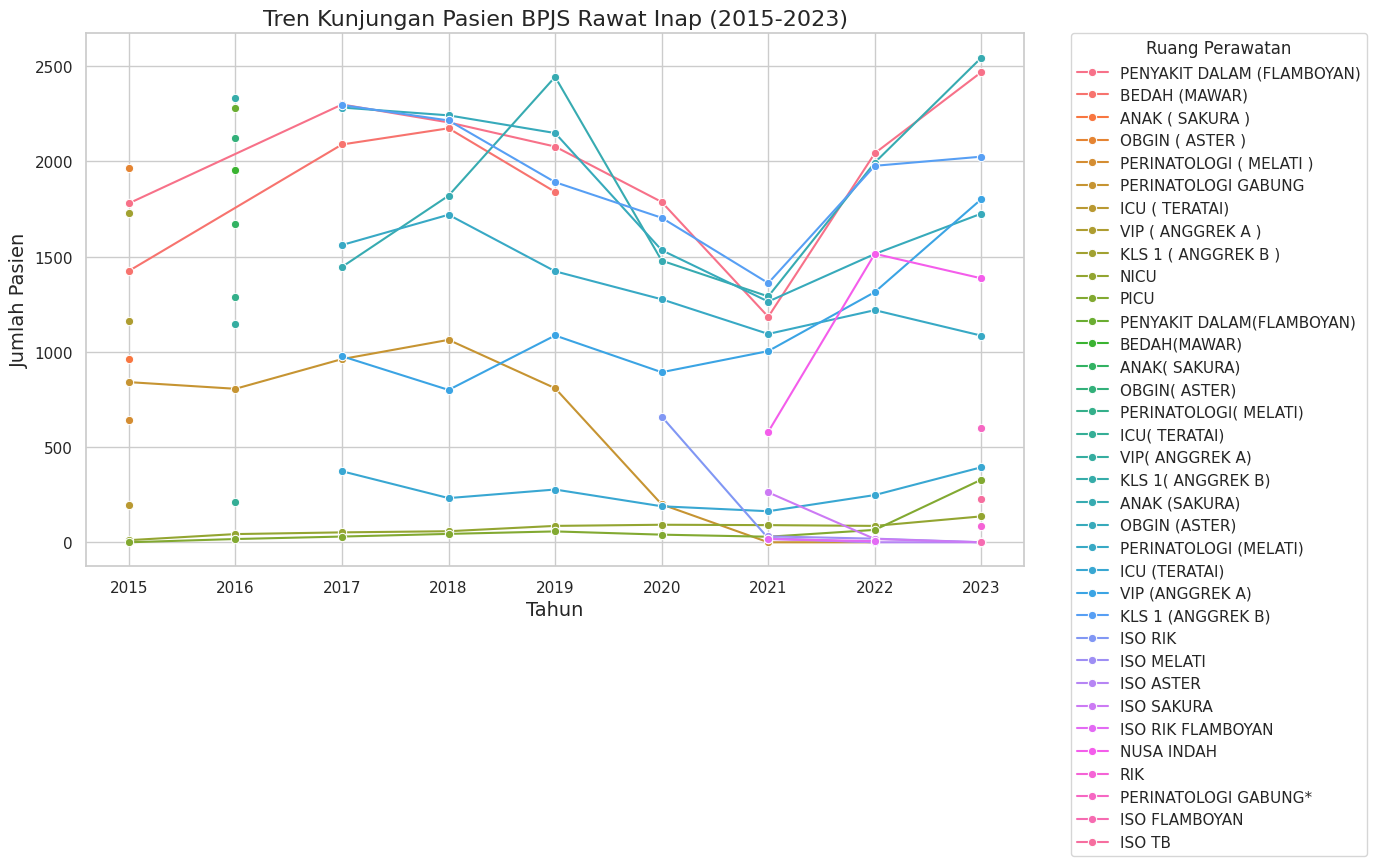

In [12]:
# Plotting overall trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='tahun', y='jumlah_pasien', hue='nama_ruang_perawatan', data=data, marker='o')
plt.title('Tren Kunjungan Pasien BPJS Rawat Inap (2015-2023)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Pasien', fontsize=14)
plt.legend(title='Ruang Perawatan', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan tren jumlah pasien BPJS rawat inap di setiap ruang perawatan dari waktu ke waktu. Dengan memplotkan ini, kita dapat mengidentifikasi tren jangka panjang dan fluktuasi tahunan yang terjadi di berbagai ruang perawatan.

In [13]:
# Mengelompokkan data berdasarkan tahun dan ruang perawatan
data_grouped = data.groupby(['tahun', 'nama_ruang_perawatan'])['jumlah_pasien'].sum().reset_index()

In [14]:
# Memilih satu ruang perawatan untuk analisis decomposisi
room_data = data_grouped[data_grouped['nama_ruang_perawatan'] == 'PENYAKIT DALAM (FLAMBOYAN)']

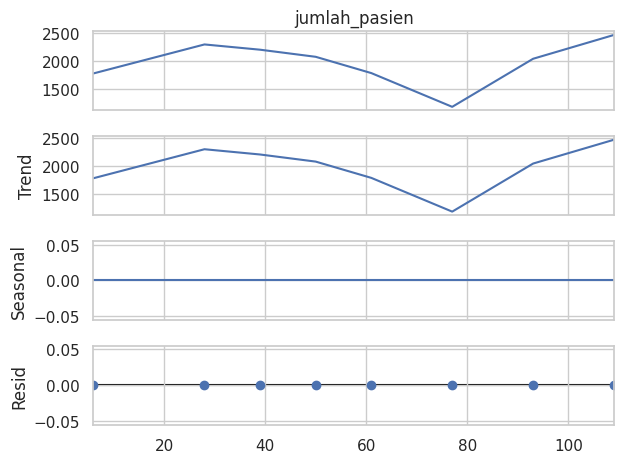

In [15]:
# Melakukan decomposisi
decomposition = sm.tsa.seasonal_decompose(room_data['jumlah_pasien'], period=1, model='additive')
decomposition.plot()
plt.show()

Decomposition memungkinkan kita untuk melihat komponen musiman (seasonality), tren jangka panjang, dan komponen acak (residual) dari data runtun waktu. Ini membantu kita memahami apakah pola yang terlihat adalah bagian dari tren jangka panjang atau hanya fluktuasi musiman.

In [16]:
# Menggunakan model ARIMA untuk prediksi
model = ARIMA(room_data['jumlah_pasien'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [17]:
# Melakukan prediksi untuk 5 tahun ke depan
forecast = model_fit.forecast(steps=5)
print("Forecast for the next 5 periods:\n", forecast)

Forecast for the next 5 periods:
 8     2311.706967
9     2411.029076
10    2348.312494
11    2387.914650
12    2362.908014
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model ARIMA digunakan untuk memprediksi nilai masa depan berdasarkan data historis. Dengan model ini, kita bisa memprediksi jumlah pasien yang mungkin akan datang di tahun-tahun berikutnya, yang dapat membantu dalam perencanaan sumber daya rumah sakit.

## **Kesimpulan**
Dari analisis ini, kita bisa menyimpulkan beberapa hal penting:
1. Tren Tahunan: Ada perubahan yang signifikan dalam jumlah pasien dari tahun ke tahun. Beberapa ruang perawatan menunjukkan peningkatan, sementara yang lain mengalami penurunan.
2. Distribusi Berdasarkan Ruang Perawatan: Ruang perawatan tertentu, seperti Penyakit Dalam dan Bedah, cenderung memiliki jumlah pasien yang lebih tinggi dibandingkan dengan ruang perawatan lainnya.
3. Forecasting: Prediksi menggunakan model ARIMA menunjukkan bahwa jumlah pasien di ruang perawatan tertentu mungkin akan mengalami peningkatan/penurunan di masa depan.